# Técnica de Árboles de Decisión para predecir un derrame cerebral

## Importar librerías

In [1]:
import pandas as pd
import sklearn
import warnings

## 1. Lectura del archivo 'stroke.csv'

In [2]:
#----------------------------------------------------------
# Data URL
#----------------------------------------------------------
url = ("https://raw.githubusercontent.com/jorgeasmz/IA-Report/main/stroke.csv")

data = pd.read_csv(url, sep=",")

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
695,Female,29.0,0,0,Yes,Private,Rural,91.45,24.2,never smoked,0
696,Female,12.0,0,0,No,children,Rural,90.58,19.2,Unknown,0
697,Female,37.0,0,0,Yes,Private,Urban,91.45,25.8,Unknown,0
698,Female,30.0,0,0,Yes,Private,Rural,89.63,23.2,smokes,0


In [3]:
#----------------------------------------------------------
# Data information
#----------------------------------------------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             700 non-null    object 
 1   age                700 non-null    float64
 2   hypertension       700 non-null    int64  
 3   heart_disease      700 non-null    int64  
 4   ever_married       700 non-null    object 
 5   work_type          700 non-null    object 
 6   Residence_type     700 non-null    object 
 7   avg_glucose_level  700 non-null    float64
 8   bmi                651 non-null    float64
 9   smoking_status     700 non-null    object 
 10  stroke             700 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 60.3+ KB


In [4]:
#----------------------------------------------------------
# Categoric variables of type 'object'
#----------------------------------------------------------
data.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,700,700,700,700,700
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,414,522,410,356,265


In [5]:
#----------------------------------------------------------
# Quantitative variables of type 'int'
#----------------------------------------------------------
data.select_dtypes(include=['int64']).describe()

,hypertension,heart_disease,stroke
count,700.000000,700.000000,700.000000
mean,0.151429,0.095714,0.355714
std,0.358722,0.294409,0.479072
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [6]:
#----------------------------------------------------------
# Quantitative variables of type 'float'
#----------------------------------------------------------
data.select_dtypes(include=['float64']).describe()

,age,avg_glucose_level,bmi
count,700.000000,700.000000,651.000000
mean,51.485200,116.647786,29.857143
std,22.401775,53.171734,8.008309
min,0.320000,55.250000,12.000000
25%,36.000000,78.787500,24.450000
50%,55.000000,96.925000,28.500000
75%,71.000000,137.795000,34.300000
max,82.000000,271.740000,71.900000


## 2. Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas

In [7]:
from sklearn.model_selection import train_test_split 

N = len(data) # Number of data available
cTrain = int(N * 0.8) # 80% for training 
cTest = N - cTrain # 20% for testing
print(N, cTrain, cTest) # Number of data, Training data, Testing data
train_data, test_data = train_test_split(data, train_size=cTrain, test_size=cTest)

700 560 140


In [8]:
#----------------------------------------------------------
# Training data dimensions
#----------------------------------------------------------
train_data.shape

(560, 11)

In [9]:
#----------------------------------------------------------
# First 5 rows of the training data set
#----------------------------------------------------------
train_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
361,Female,39.0,0,0,Yes,Self-employed,Rural,89.86,24.4,never smoked,0
524,Female,38.0,0,0,Yes,Govt_job,Urban,70.92,41.6,never smoked,0
444,Female,63.0,1,0,Yes,Self-employed,Rural,227.10,26.9,Unknown,0
554,Male,5.0,0,0,No,children,Rural,71.43,19.3,Unknown,0
187,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1


In [10]:
#-----------------------------------------------------------------
# Description of the quantitative variables for the training data
#----------------------------------------------------------------
test_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,140.000000,140.000000,140.000000,140.000000,133.000000,140.000000
mean,51.157714,0.171429,0.078571,121.519214,31.407519,0.350000
std,21.929666,0.378236,0.270035,56.619566,9.079002,0.478682
min,1.080000,0.000000,0.000000,55.250000,16.400000,0.000000
25%,36.250000,0.000000,0.000000,82.182500,25.900000,0.000000
50%,55.500000,0.000000,0.000000,96.790000,29.800000,0.000000
75%,70.000000,0.000000,0.000000,149.472500,35.800000,1.000000
max,82.000000,1.000000,1.000000,263.320000,71.900000,1.000000


## 3. Utilizar una estrategia para normalizar los datos y llenar los datos faltantes

### Pipeline para atributos categóricos

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 5 categoric variables
cat_attribs = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

### Pipeline para atributos cuantitativos

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 5 numeric variables
num_attribs = ['hypertension', 'heart_disease', 'age', 'avg_glucose_level', 'bmi']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    ])

### Pipeline completo

In [13]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs), 
])

### Conjunto de entrenamiento

In [14]:
#----------------------------------------------------------
# Training data transformation
# Independent variables
#----------------------------------------------------------
X_train = full_pipeline.fit_transform(train_data)

In [15]:
#----------------------------------------------------------
# Nodes for numeric variables: 5 -> 'hypertension', 
#                                     'heart_disease',
#                                     'age',
#                                     'avg_glucose_level',
#                                     'bmi'
#
# Nodes for categoric variables: 15 -> 'gender': 2 -> 'Male',
#                                                       'Female'
#                                        'ever_married': 2 -> 'No',
#                                                             'Yes'
#                                        'work_type': 5 -> 'children',
#                                                          'Govt_job',
#                                                          'Never_worked',
#                                                          'Private',
#                                                          'Self-employed'
#                                        'Residence_type': 2 -> 'Rural',
#                                                               'Urban'
#                                        'smoking_status': 4 -> 'formerly smoked',
#                                                               'never smoked',
#                                                               'smokes',
#                                                               'Unknown'
#----------------------------------------------------------
X_train.shape

(560, 20)

In [16]:
#----------------------------------------------------------
# First row of the transformed train data
#----------------------------------------------------------
X_train[0, :]

array([-0.41418368, -0.33333333, -0.5581227 , -0.48975391, -0.67477278,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ])

In [17]:
#----------------------------------------------------------
# Dependent variable: 'stroke' -> 0, 1
#----------------------------------------------------------
y_train = train_data['stroke']
y_train

361    0
524    0
444    0
554    0
187    1
      ..
617    0
522    0
225    1
231    1
423    0
Name: stroke, Length: 560, dtype: int64

### Conjunto de prueba

In [18]:
#----------------------------------------------------------
# Testing data transformation
# Independent variables
#----------------------------------------------------------
X_test = full_pipeline.fit_transform(test_data)

In [19]:
X_test.shape

(140, 20)

In [20]:
X_test

array([[ 2.19848433, -0.29201253,  0.58771521, ...,  0.        ,
         1.        ,  0.        ],
       [-0.45485883, -0.29201253,  0.03854642, ...,  1.        ,
         0.        ,  0.        ],
       [-0.45485883, -0.29201253,  0.58771521, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 2.19848433, -0.29201253,  0.9995918 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.45485883, -0.29201253,  0.22160268, ...,  0.        ,
         1.        ,  0.        ],
       [-0.45485883, -0.29201253,  0.08431048, ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
#----------------------------------------------------------
# First row of the transformed test data
#----------------------------------------------------------
X_test[0, :]

array([ 2.19848433, -0.29201253,  0.58771521, -0.58473899, -0.76247728,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ])

In [22]:
#----------------------------------------------------------
# Dependent variable: 'stroke' -> 0, 1
#----------------------------------------------------------
y_test = test_data['stroke']
y_test

565    0
333    0
412    0
559    0
351    0
      ..
294    0
446    0
130    1
592    0
490    0
Name: stroke, Length: 140, dtype: int64

## 4. Configurar los hiperparámetros del árbol de decisión de la siguiente manera: criterion=gini, splitter=best, y random_state=123. Obtener 10 árboles de decisión que resultan de modificar el hiperparámetro max_depth desde 5 hasta 50 con incrementos de 5

In [58]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

#----------------------------------------------------------
# List for the models
#----------------------------------------------------------
first_set = []

#----------------------------------------------------------
# List of the maximum depths for the trees
#----------------------------------------------------------
max_depths = range(5, 55, 5)

for max_depth in max_depths:
    # Create the decision tree
    model = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=max_depth, random_state=123)
    # Train the model
    model.fit(X_train, y_train)
    # Test the model
    y_pred = model.predict(X_test)
    # Calculate the accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    # Calculate the Cross-Validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Mean of the CV scores
    scores_mean = scores.mean()
    # Calculate the confusion matrix of the model
    confusion = confusion_matrix(y_test, y_pred)
    # Save the result
    print("----------------------------------")
    print(f"Cross-Validation scores for max_depth = {max_depth}:")
    print(scores)
    first_set.append({"Depth": max_depth, 
                      "Scores (mean)": scores_mean, 
                      "Accuracy": accuracy, 
                      "Confusion matrix": confusion})

----------------------------------
Cross-Validation scores for max_depth = 5:
[0.74107143 0.78571429 0.66964286 0.77678571 0.72321429]
----------------------------------
Cross-Validation scores for max_depth = 10:
[0.71428571 0.75892857 0.64285714 0.72321429 0.67857143]
----------------------------------
Cross-Validation scores for max_depth = 15:
[0.6875     0.75892857 0.58928571 0.74107143 0.66071429]
----------------------------------
Cross-Validation scores for max_depth = 20:
[0.6875     0.75892857 0.58928571 0.74107143 0.66071429]
----------------------------------
Cross-Validation scores for max_depth = 25:
[0.6875     0.75892857 0.58928571 0.74107143 0.66071429]
----------------------------------
Cross-Validation scores for max_depth = 30:
[0.6875     0.75892857 0.58928571 0.74107143 0.66071429]
----------------------------------
Cross-Validation scores for max_depth = 35:
[0.6875     0.75892857 0.58928571 0.74107143 0.66071429]
----------------------------------
Cross-Validati

## 5. Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior

In [59]:
import pandas as pd

#----------------------------------------------------------
# Table of results
#----------------------------------------------------------
first_table = pd.DataFrame(first_set)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(first_table)

   Depth  Scores (mean)  Accuracy      Confusion matrix
0      5          0.739     0.736  [[80, 11], [26, 23]]
1     10          0.704     0.714  [[72, 19], [21, 28]]
2     15          0.688     0.707  [[73, 18], [23, 26]]
3     20          0.688     0.700  [[71, 20], [22, 27]]
4     25          0.688     0.700  [[71, 20], [22, 27]]
5     30          0.688     0.700  [[71, 20], [22, 27]]
6     35          0.688     0.700  [[71, 20], [22, 27]]
7     40          0.688     0.700  [[71, 20], [22, 27]]
8     45          0.688     0.700  [[71, 20], [22, 27]]
9     50          0.688     0.700  [[71, 20], [22, 27]]


### Mejor árbol

In [60]:
#----------------------------------------------------------
# Model with the maximun accuracy
#----------------------------------------------------------
first_max_accuracy_model = max(first_set, key=lambda x: x["Accuracy"])

print("*", first_max_accuracy_model["Depth"])
print("*", first_max_accuracy_model["Scores (mean)"])
print("*", first_max_accuracy_model["Accuracy"])

* 5
* 0.7392857142857143
* 0.7357


Para los hiperparámetros criterion='gini', splitter='best' y random_state=123 el árbol con mejor *accuracy* es:

**Profundidad:** 5 <br>
**Promedio de puntajes:** 0,7393 <br>
**Accuracy:** 0.7357

### Matriz de confusión

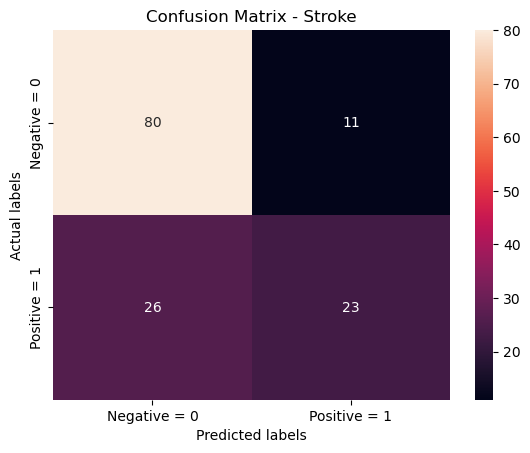

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(first_max_accuracy_model['Confusion matrix'], annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Stroke') 
ax.xaxis.set_ticklabels(['Negative = 0', 'Positive = 1'])
ax.yaxis.set_ticklabels(['Negative = 0', 'Positive = 1']);
plt.show();

## 6. Repita el mismo procedimiento del punto 4 usando como hiperparámetros criterion=entropy, splitter=best, random_state=123, y variando el hiperparámetro max_depth desde 5 hasta 50 con incrementos de 5

In [64]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

#----------------------------------------------------------
# List for the models
#----------------------------------------------------------
second_set = []

#----------------------------------------------------------
# List of the maximum depths for the trees
#----------------------------------------------------------
max_depths = range(5, 55, 5)

for max_depth in max_depths:
    # Create the decision tree
    model = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=max_depth, random_state=123)
    # Train the model
    model.fit(X_train, y_train)
    # Test the model
    y_pred = model.predict(X_test)
    # Calculate the accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    # Calculate the Cross-Validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Mean of the CV scores
    scores_mean = scores.mean()
    # Calculate the confusion matrix of the model
    confusion = confusion_matrix(y_test, y_pred)
    # Save the result
    print("----------------------------------")
    print(f"Cross-Validation scores for max_depth = {max_depth}:")
    print(scores)
    second_set.append({"Depth": max_depth, 
                      "Scores (mean)": scores_mean, 
                      "Accuracy": accuracy, 
                      "Confusion matrix": confusion})

----------------------------------
Cross-Validation scores for max_depth = 5:
[0.75       0.79464286 0.67857143 0.75       0.78571429]
----------------------------------
Cross-Validation scores for max_depth = 10:
[0.63392857 0.77678571 0.66964286 0.67857143 0.69642857]
----------------------------------
Cross-Validation scores for max_depth = 15:
[0.66964286 0.78571429 0.625      0.65178571 0.67857143]
----------------------------------
Cross-Validation scores for max_depth = 20:
[0.625      0.77678571 0.59821429 0.65178571 0.69642857]
----------------------------------
Cross-Validation scores for max_depth = 25:
[0.66964286 0.77678571 0.59821429 0.65178571 0.69642857]
----------------------------------
Cross-Validation scores for max_depth = 30:
[0.66964286 0.77678571 0.59821429 0.65178571 0.69642857]
----------------------------------
Cross-Validation scores for max_depth = 35:
[0.66964286 0.77678571 0.59821429 0.65178571 0.69642857]
----------------------------------
Cross-Validati

## 7. Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior

In [65]:
import pandas as pd

#----------------------------------------------------------
# Table of results
#----------------------------------------------------------
second_table = pd.DataFrame(second_set)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(second_table)

   Depth  Scores (mean)  Accuracy      Confusion matrix
0      5          0.752     0.743  [[80, 11], [25, 24]]
1     10          0.691     0.743  [[71, 20], [16, 33]]
2     15          0.682     0.743  [[74, 17], [19, 30]]
3     20          0.670     0.721  [[74, 17], [22, 27]]
4     25          0.679     0.707  [[74, 17], [24, 25]]
5     30          0.679     0.707  [[74, 17], [24, 25]]
6     35          0.679     0.707  [[74, 17], [24, 25]]
7     40          0.679     0.707  [[74, 17], [24, 25]]
8     45          0.679     0.707  [[74, 17], [24, 25]]
9     50          0.679     0.707  [[74, 17], [24, 25]]


### Mejor árbol

In [66]:
#----------------------------------------------------------
# Model with the maximun accuracy
#----------------------------------------------------------
second_max_accuracy_model = max(second_set, key=lambda x: x["Accuracy"])

print("*", second_max_accuracy_model["Depth"])
print("*", second_max_accuracy_model["Scores (mean)"])
print("*", second_max_accuracy_model["Accuracy"])

* 5
* 0.7517857142857143
* 0.7429


Para los hiperparámetros criterion='entropy', splitter='best' y random_state=123 el árbol con mejor *accuracy* es:

**Profundidad:** 5 <br>
**Promedio de puntajes:** 0,7518 <br>
**Accuracy:** 0.7429

### Matriz de confusión

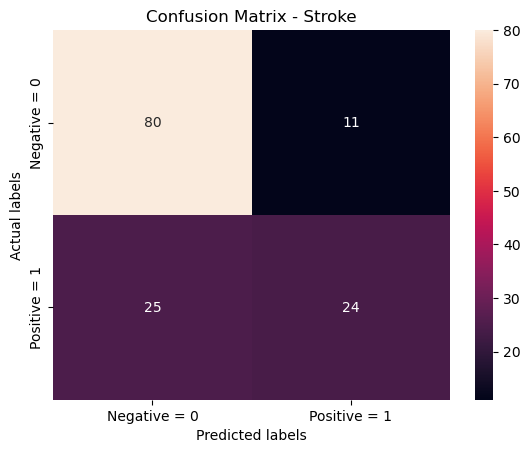

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(second_max_accuracy_model['Confusion matrix'], annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Stroke') 
ax.xaxis.set_ticklabels(['Negative = 0', 'Positive = 1'])
ax.yaxis.set_ticklabels(['Negative = 0', 'Positive = 1']);
plt.show();

## 8. Repita el mismo procedimiento del punto 4 usando como hiperparámetros criterion=entropy, splitter=random, random_state=123, y variando el hiperparámetro max_depth desde 5 hasta 50 con incrementos de 5

In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

#----------------------------------------------------------
# List for the models
#----------------------------------------------------------
third_set = []

#----------------------------------------------------------
# List of the maximum depths for the trees
#----------------------------------------------------------
max_depths = range(5, 55, 5)

for max_depth in max_depths:
    # Create the decision tree
    model = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=max_depth, random_state=123)
    # Train the model
    model.fit(X_train, y_train)
    # Test the model
    y_pred = model.predict(X_test)
    # Calculate the accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    # Calculate the Cross-Validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Mean of the CV scores
    scores_mean = scores.mean()
    # Calculate the confusion matrix of the model
    confusion = confusion_matrix(y_test, y_pred)
    # Save the result
    print("----------------------------------")
    print(f"Cross-Validation scores for max_depth = {max_depth}:")
    print(scores)
    third_set.append({"Depth": max_depth, 
                      "Scores (mean)": scores_mean, 
                      "Accuracy": accuracy, 
                      "Confusion matrix": confusion})

----------------------------------
Cross-Validation scores for max_depth = 5:
[0.76785714 0.77678571 0.72321429 0.78571429 0.71428571]
----------------------------------
Cross-Validation scores for max_depth = 10:
[0.77678571 0.75       0.6875     0.70535714 0.67857143]
----------------------------------
Cross-Validation scores for max_depth = 15:
[0.73214286 0.73214286 0.69642857 0.70535714 0.6875    ]
----------------------------------
Cross-Validation scores for max_depth = 20:
[0.75       0.71428571 0.69642857 0.69642857 0.72321429]
----------------------------------
Cross-Validation scores for max_depth = 25:
[0.75       0.72321429 0.69642857 0.69642857 0.72321429]
----------------------------------
Cross-Validation scores for max_depth = 30:
[0.75       0.72321429 0.69642857 0.69642857 0.72321429]
----------------------------------
Cross-Validation scores for max_depth = 35:
[0.75       0.72321429 0.69642857 0.69642857 0.72321429]
----------------------------------
Cross-Validati

## 9. Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior

In [73]:
import pandas as pd

#----------------------------------------------------------
# Table of results
#----------------------------------------------------------
third_table = pd.DataFrame(third_set)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(third_table)

   Depth  Scores (mean)  Accuracy      Confusion matrix
0      5          0.754     0.743  [[77, 14], [22, 27]]
1     10          0.720     0.714  [[73, 18], [22, 27]]
2     15          0.711     0.679  [[72, 19], [26, 23]]
3     20          0.716     0.729  [[75, 16], [22, 27]]
4     25          0.718     0.729  [[75, 16], [22, 27]]
5     30          0.718     0.729  [[75, 16], [22, 27]]
6     35          0.718     0.729  [[75, 16], [22, 27]]
7     40          0.718     0.729  [[75, 16], [22, 27]]
8     45          0.718     0.729  [[75, 16], [22, 27]]
9     50          0.718     0.729  [[75, 16], [22, 27]]


### Mejor árbol

In [74]:
#----------------------------------------------------------
# Model with the maximun accuracy
#----------------------------------------------------------
third_max_accuracy_model = max(third_set, key=lambda x: x["Accuracy"])

print("*", third_max_accuracy_model["Depth"])
print("*", third_max_accuracy_model["Scores (mean)"])
print("*", third_max_accuracy_model["Accuracy"])

* 5
* 0.7535714285714286
* 0.7429


Para los hiperparámetros criterion='entropy', splitter='random' y random_state=123 el árbol con mejor *accuracy* es:

**Profundidad:** 5 <br>
**Promedio de puntajes:** 0,7536 <br>
**Accuracy:** 0.7429

### Matriz de confusión

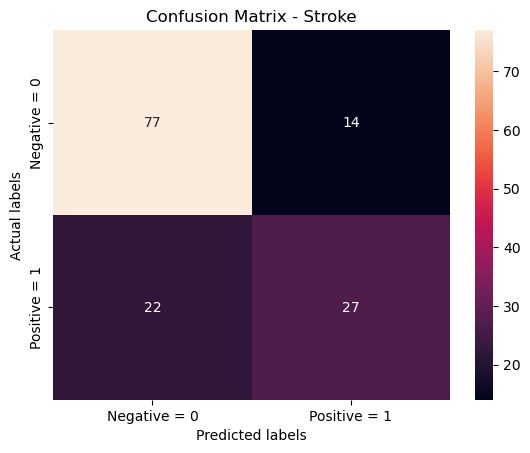

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(third_max_accuracy_model['Confusion matrix'], annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Stroke') 
ax.xaxis.set_ticklabels(['Negative = 0', 'Positive = 1'])
ax.yaxis.set_ticklabels(['Negative = 0', 'Positive = 1']);
plt.show();

## 10. Indique en el notebook los hiperparámetros que por el momento le permiten obtener el árbol con mayor *accuracy*

In [78]:
#----------------------------------------------------------
# First model with the maximun accuracy
#----------------------------------------------------------
print("First")
print("--------------------------")
print("*", first_max_accuracy_model["Accuracy"])
print("*", first_max_accuracy_model["Scores (mean)"])
print("--------------------------")

#----------------------------------------------------------
# Second model with the maximun accuracy
#----------------------------------------------------------
print("Second")
print("--------------------------")
print("*", second_max_accuracy_model["Accuracy"])
print("*", second_max_accuracy_model["Scores (mean)"])
print("--------------------------")

#----------------------------------------------------------
# Third model with the maximun accuracy
#----------------------------------------------------------
print("Third")
print("--------------------------")
print("*", third_max_accuracy_model["Accuracy"])
print("*", third_max_accuracy_model["Scores (mean)"])
print("--------------------------")

First
--------------------------
* 0.7357
* 0.7392857142857143
--------------------------
Second
--------------------------
* 0.7429
* 0.7517857142857143
--------------------------
Third
--------------------------
* 0.7429
* 0.7535714285714286
--------------------------


Dado a que los modelos del punto 6 y 8 proporcionan el mismo *accuracy*, se tienen en cuenta la media de *scores*. Así, el modelo con mayor *accuracy* es el del punto 8, con los siguientes hiperparámtros:

**Cirterion:** *entropy* <br>
**Splitter:** *random* <br>
**Random_State:** 123 <br>
**Profundidad:** 5 <br>
**Promedio de puntajes:** 0,7536 <br>
**Accuracy:** 0.7429

## 11. Seleccione uno de los hiperparámetros disponibles en la documentación que sea diferente al criterion, splitter, max_depth, y random_state. Realice dos variaciones en el hiperparámetro seleccionado manteniendo los otros hiperparámetros del punto anterior. Indique el accuracy obtenido al modificar el hiperparámetro seleccionado y analice si el árbol de decisión mejora, empeora, o mantiene su exactitud.

In [89]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

#----------------------------------------------------------
# List for the models
#----------------------------------------------------------
new_results = []

#----------------------------------------------------------
# Number of features to consider when looking for the best split
#----------------------------------------------------------
max_features = ['auto', 'sqrt', 'log2']

for max_f in max_features:
    # Create the decision tree
    model = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=5, random_state=123, max_features=max_f)
    # Train the model
    model.fit(X_train, y_train)
    # Test the model
    y_pred = model.predict(X_test)
    # Calculate the accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    # Calculate the Cross-Validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Mean of the CV scores
    scores_mean = scores.mean()
    # Calculate the confusion matrix of the model
    confusion = confusion_matrix(y_test, y_pred)
    # Save the result
    print("----------------------------------")
    print(f"Cross-Validation scores for max_depth = {max_depth}:")
    print(scores)
    new_results.append({"Scores (mean)": scores_mean, 
                        "Accuracy": accuracy, 
                        "Confusion matrix": confusion})

----------------------------------
Cross-Validation scores for max_depth = 50:
[0.6875     0.66964286 0.70535714 0.72321429 0.75892857]
----------------------------------
Cross-Validation scores for max_depth = 50:
[0.6875     0.66964286 0.70535714 0.72321429 0.75892857]
----------------------------------
Cross-Validation scores for max_depth = 50:
[0.6875     0.66964286 0.70535714 0.72321429 0.75892857]


In [90]:
import pandas as pd

#----------------------------------------------------------
# Modified decision tree results
#----------------------------------------------------------
new_table = pd.DataFrame(new_results)
display(new_table)

,Scores (mean),Accuracy,Confusion matrix
0,0.708929,0.7071,"[[91, 0], [41, 8]]"
1,0.708929,0.7071,"[[91, 0], [41, 8]]"
2,0.708929,0.7071,"[[91, 0], [41, 8]]"


In [91]:
#----------------------------------------------------------
# Original decision tree accuracy
#----------------------------------------------------------
print("Accuracy del árbol de decisión del punto 8 (mejor hasta ahora):", third_max_accuracy_model["Accuracy"])

#----------------------------------------------------------
# Modifed decision tree accuracy
#----------------------------------------------------------
max_accuracy_n = max(new_results, key=lambda x: x["Accuracy"])

print("Accuracy del árbol de decisión del punto 11 (modificado)", max_accuracy_n["Accuracy"])

Accuracy del árbol de decisión del punto 8 (mejor hasta ahora): 0.7429
Accuracy del árbol de decisión del punto 11 (modificado) 0.7071


### Análisis

Con base en el hecho de que el árbol de decisión modificado en el punto 11, presentó una reducción en el *accuracy*, se puede concluir que el árbol empeoró al modificar el parámetro 'max_features'.

Por lo tanto, el árbol de decisión que mejores resultados genera, tiene los siguientes hiperparámetros:

**Cirterion:** *entropy* <br>
**Splitter:** *random* <br>
**Random_State:** 123 <br>
**Profundidad:** 5 <br>
**Promedio de puntajes:** 0,7536 <br>
**Accuracy:** 0.7429 <br>
**Matriz de confusión:** [[77 14], [22, 27]]